In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D
from keras import Input, Model,layers
import numpy as np
import matplotlib.pyplot as plt

import splitfolders
from keras.preprocessing.image import ImageDataGenerator

#Split all images into 3 sets : Train,test and validate
splitfolders.ratio('C:/Users/SHAURYA/OneDrive/Desktop/Chess/', output='C:/Users/SHAURYA/OneDrive/Desktop/A/',seed=215, ratio=(0.6, 0.2, 0.2))












Copying files: 556 files [00:07, 78.59 files/s]


In [13]:
from sklearn.metrics import classification_report
from keras.layers import Dropout,Flatten
DirectTrain="C:/Users/SHAURYA/OneDrive/Desktop/A/train/"
DirectTest="C:/Users/SHAURYA/OneDrive/Desktop/A/test/"
DirectValidate="C:/Users/SHAURYA/OneDrive/Desktop/A/val/"
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.3)
input_shape = (400, 400, 3)
batch_size = 16
#train,test and validate will use imagedatagenerator for better image processing
train_generator = train_datagen.flow_from_directory(
    DirectTrain,
    target_size=(400, 400),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,  # we shuffle our images for better performance
    seed=8)
test_generator = train_datagen.flow_from_directory(
    DirectTest,
    target_size=(400, 400),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True, 
    seed=8)
validation_generator = train_datagen.flow_from_directory(
    DirectValidate,
    target_size=(400, 400),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=7)

model = Sequential([
    #This is the autoencoder model. 1st part is the encoding block
    Conv2D(16, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.2),
   
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.2),
    #Now the decoding part
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')

])
#This function improves the model by creating a variable learning rate, which self adjusts while training
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()



Found 233 images belonging to 6 classes.
Found 83 images belonging to 6 classes.
Found 31 images belonging to 6 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 400, 400, 16)      448       
                                                                 
 conv2d_16 (Conv2D)          (None, 400, 400, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 200, 200, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 200, 200, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 200, 200, 64)      18496     
                                                                 

C:\Users\SHAURYA\AppData\Local\Temp\ipykernel_261488\1756762457.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=25, validation_data=validation_generator)


Epoch 1/25
15/15 [==============================] - 17s 1s/step - loss: 1.9865 - accuracy: 0.1631 - val_loss: 0.6270 - val_accuracy: 0.1613
Epoch 2/25
15/15 [==============================] - 16s 1s/step - loss: 0.5027 - accuracy: 0.2103 - val_loss: 0.5362 - val_accuracy: 0.2258
Epoch 3/25
15/15 [==============================] - 16s 1s/step - loss: 0.4570 - accuracy: 0.2833 - val_loss: 0.5423 - val_accuracy: 0.2258
Epoch 4/25
15/15 [==============================] - 17s 1s/step - loss: 0.3976 - accuracy: 0.4335 - val_loss: 0.5216 - val_accuracy: 0.1613
Epoch 5/25
15/15 [==============================] - 17s 1s/step - loss: 0.2876 - accuracy: 0.6137 - val_loss: 0.5075 - val_accuracy: 0.2903
Epoch 6/25
15/15 [==============================] - 17s 1s/step - loss: 0.2026 - accuracy: 0.7639 - val_loss: 0.5609 - val_accuracy: 0.2581
Epoch 7/25
15/15 [==============================] - 16s 1s/step - loss: 0.1420 - accuracy: 0.8455 - val_loss: 0.6950 - val_accuracy: 0.3226
Epoch 8/25
15/15 [==

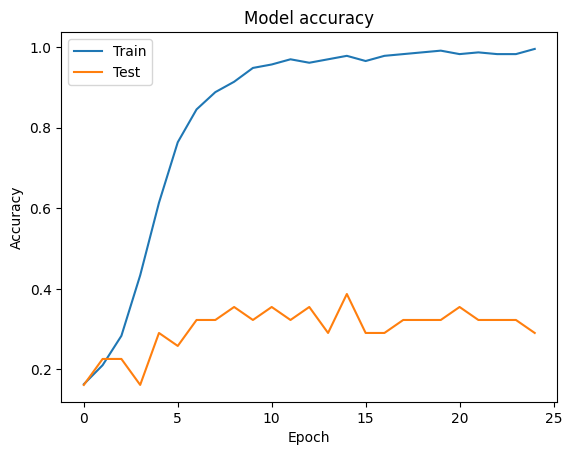

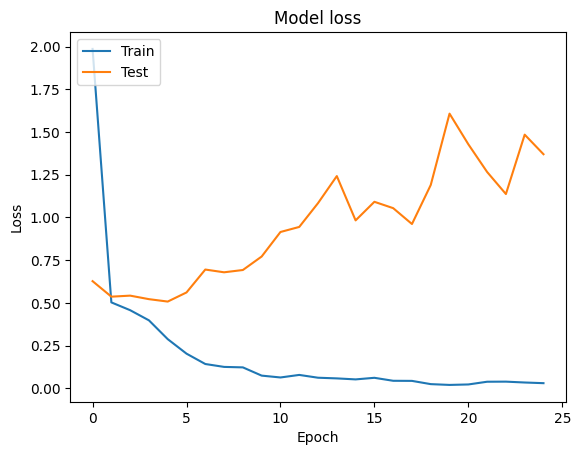

C:\Users\SHAURYA\AppData\Local\Temp\ipykernel_261488\1756762457.py:21: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size + 1)



Classification Report
              precision    recall  f1-score   support

      Bishop       0.00      0.00      0.00         5
        King       0.00      0.00      0.00         4
        Rook       0.12      0.17      0.14         6
        Pawn       0.00      0.00      0.00         6
       Queen       0.00      0.00      0.00         4
      Knight       0.33      0.50      0.40         6

    accuracy                           0.13        31
   macro avg       0.08      0.11      0.09        31
weighted avg       0.09      0.13      0.11        31



In [14]:
history = model.fit_generator(train_generator, epochs=25, validation_data=validation_generator)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [21]:
# pred = model.predict(test_generator)
# for i in range(5):
#     # Display original
#     ax = plt.subplot(2, 5, i + 1)
#     plt.imshow(test_generator[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
#     # Display reconstruction
#     ax = plt.subplot(2, 5, i + 1 + 5)
#     plt.imshow(pred[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()
#Tried to show images with predicted output, but code didnt work
num_of_test_samples = 200
#Classification Report
Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)




print('\nClassification Report')
target_names = ['Bishop',
                'King',
                'Rook',
                'Pawn',
                'Queen',
                'Knight']
class_report = classification_report(test_generator.classes, y_pred, target_names=target_names)
print(class_report)

C:\Users\SHAURYA\AppData\Local\Temp\ipykernel_261488\300111592.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size + 1)



Classification Report
              precision    recall  f1-score   support

      Bishop       0.18      0.17      0.17        12
        King       0.11      0.17      0.13        12
        Rook       0.07      0.06      0.07        16
        Pawn       0.38      0.31      0.34        16
       Queen       0.09      0.08      0.09        12
      Knight       0.19      0.20      0.19        15

    accuracy                           0.17        83
   macro avg       0.17      0.17      0.17        83
weighted avg       0.18      0.17      0.17        83

